In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
P2_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P2_dist_traveled/conv_P2&1_e_P2whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [4]:
P2_tr_dis.head()

,P2_elbow_rP2whole_dist_traveled,P2_hand_rP2whole_dist_traveled,P2_shoulder_lP2whole_dist_traveled,P2_elbow_lP2whole_dist_traveled,P2_headP2whole_dist_traveled,P2_shoulder_rP2whole_dist_traveled,P2_hand_lP2whole_dist_traveled
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.228,0.438,0.000,0.867,0.635,0.230
2,0.234,0.435,0.891,0.000,1.838,2.550,2.296
3,0.234,0.657,1.825,0.000,2.772,3.379,5.939
4,0.543,0.882,2.234,0.239,3.761,3.971,7.151


In [5]:
P2_tr_dis.rename(columns= {"P2_elbow_rP2whole_dist_traveled": "elbow_r", "P2_hand_rP2whole_dist_traveled": "hand_r", "P2_shoulder_lP2whole_dist_traveled":"shoulder_l","P2_elbow_lP2whole_dist_traveled":"elbow_l", "P2_headP2whole_dist_traveled": "head", "P2_shoulder_rP2whole_dist_traveled":"shoulder_r","P2_hand_lP2whole_dist_traveled": "hand_l"}, inplace=True)

In [6]:
P2_tr_dis = P2_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

In [7]:
P2_max_dis = P2_tr_dis[::-1]
P2_max_dis = P2_max_dis.head(1)

In [8]:
P2_tr_dis.head()

,hand_l,hand_r,elbow_l,elbow_r,shoulder_l,shoulder_r,head
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.230,0.228,0.000,0.000,0.438,0.635,0.867
2,2.296,0.435,0.000,0.234,0.891,2.550,1.838
3,5.939,0.657,0.000,0.234,1.825,3.379,2.772
4,7.151,0.882,0.239,0.543,2.234,3.971,3.761


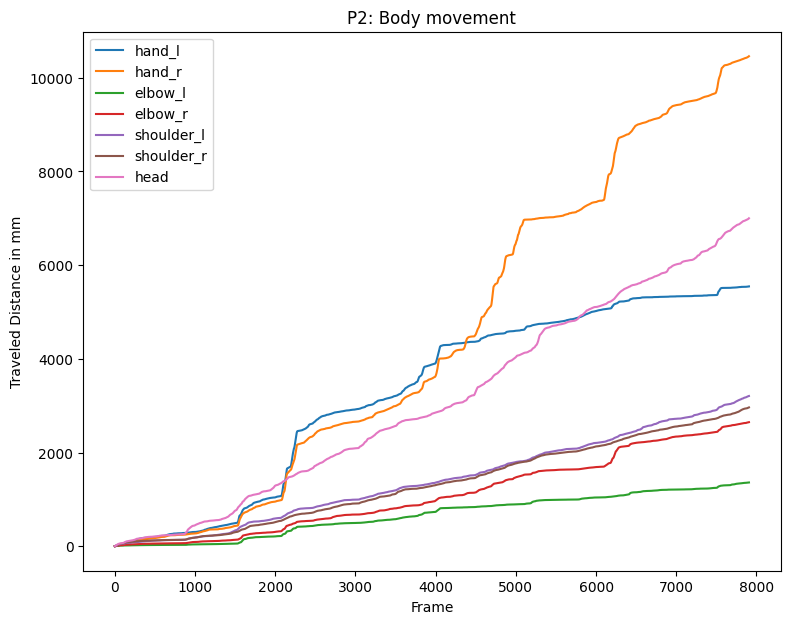

In [9]:
plt.figure(figsize = (9, 7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P2_tr_dis.index, P2_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P2: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P2_traveled_distance.png')

In [10]:
def calculate_percentage(list_of_values, sum_of_values):
    result_list = []
    for i in list_of_values:
        percentage = i*100/sum_of_values
        result_list.append(percentage)
    return result_list

Most of movement takes place in hands, but also head? Interesting. 
Next step of the analysis: distance & positions of the hands - since they clearly move the most; afterwards: head

There might be some 'patterns' in movement: e.g. looknig at the distance between hands: if it goes up (mainly Y-Dir,) both hands go auseinander; if there's only one hand moving, the distance between both hands also shows a peak, but a smaller, messier one. Normally, people tend to move one hand more than the other -> may be a hint at what to look after. 

The same thing for each Person: 

In [11]:
P1_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P1_dist_traveled/conv_P1&2_edited_P1_whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [12]:
P1_tr_dis.rename(columns= {"P1_elbow_rP1_whole_dist_traveled": "elbow_r", "P1_hand_rP1_whole_dist_traveled": "hand_r", "P1_shoulder_lP1_whole_dist_traveled":"shoulder_l","P1_elbow_lP1_whole_dist_traveled":"elbow_l", "P1_headP1_whole_dist_traveled": "head", "P1_shoulder_rP1_whole_dist_traveled":"shoulder_r","P1_hand_lP1_whole_dist_traveled": "hand_l"}, inplace=True)
P1_tr_dis = P1_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

In [13]:
P1_tr_dis.head()

,hand_l,hand_r,elbow_l,elbow_r,shoulder_l,shoulder_r,head
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
1,0.0,0.0,0.0,0.0,0.0,1.113,0.0
2,0.0,0.0,0.0,0.0,0.0,1.113,0.0
3,0.0,0.0,0.0,0.0,0.0,2.240,0.0
4,0.0,0.0,0.0,0.0,0.0,2.240,0.0


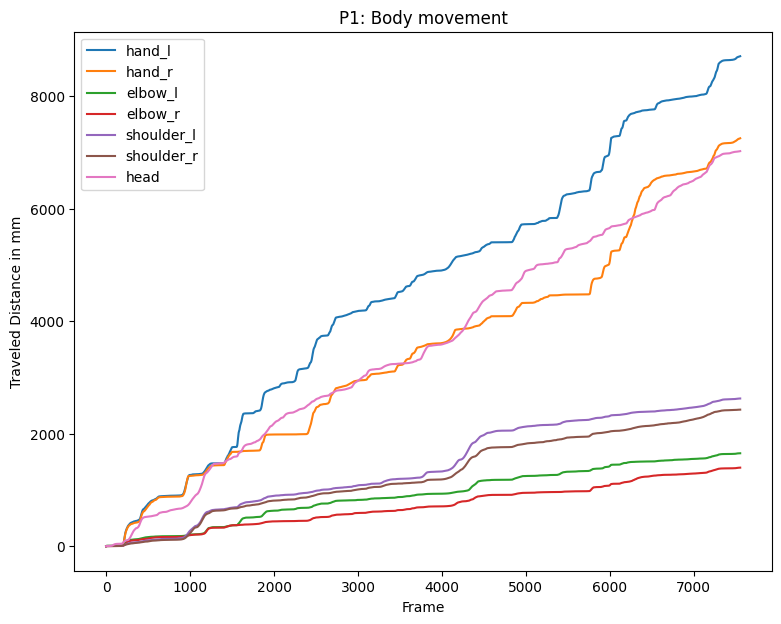

In [14]:
plt.figure(figsize = (9, 7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P1_tr_dis.index, P1_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P1: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P1_traveled_distance.png')

Now, P3 and P4:

In [15]:
P3_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P3_dist_traveled/conv_P3&4_e_P3whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [16]:
P3_tr_dis.rename(columns= {"P3_elbow_rP3whole_dist_traveled": "elbow_r", "P3_hand_rP3whole_dist_traveled": "hand_r", "P3_shoulder_lP3whole_dist_traveled":"shoulder_l","P3_elbow_lP3whole_dist_traveled":"elbow_l", "P3_headP3whole_dist_traveled": "head", "P3_shoulder_rP3whole_dist_traveled":"shoulder_r","P3_hand_lP3whole_dist_traveled": "hand_l"}, inplace=True)
P3_tr_dis = P3_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

In [17]:
P3_tr_dis.head()

,hand_l,hand_r,elbow_l,elbow_r,shoulder_l,shoulder_r,head
0,0.00,0.000,0.000,0.000,0.000,0.000,0.000
1,0.00,0.000,1.317,0.000,0.000,0.000,0.589
2,0.00,0.276,1.317,0.000,0.306,0.399,1.404
3,0.21,0.276,2.732,0.299,0.306,0.671,2.304
4,0.21,0.507,2.732,0.299,0.780,0.981,3.273


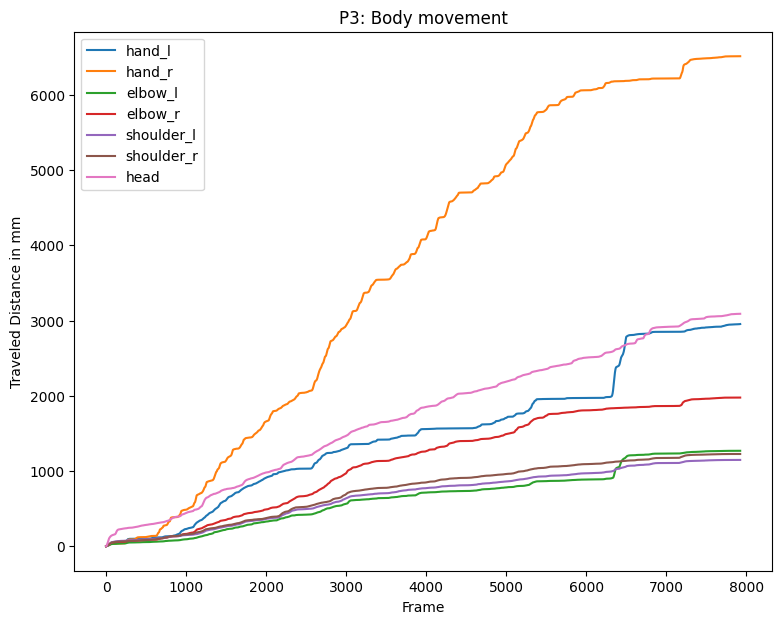

In [18]:
plt.figure(figsize=(9,7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P3_tr_dis.index, P3_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P3: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P3_traveled_distance.png')

In [19]:
P4_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P4_dist_traveled/conv_P4&3_e_P4_whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [20]:
P4_tr_dis.rename(columns= {"P4_elbow_rP4_whole_dist_traveled": "elbow_r", "P4_hand_rP4_whole_dist_traveled": "hand_r", "P4_shoulder_lP4_whole_dist_traveled":"shoulder_l","P4_elbow_lP4_whole_dist_traveled":"elbow_l", "P4_headP4_whole_dist_traveled": "head", "P4_shoulder_rP4_whole_dist_traveled":"shoulder_r","P4_hand_lP4_whole_dist_traveled": "hand_l"}, inplace=True)
P4_tr_dis = P4_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

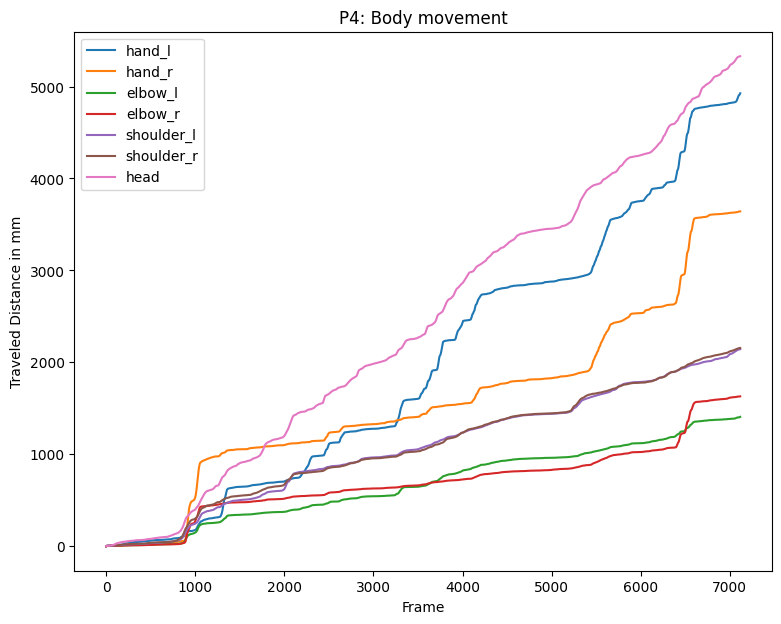

In [21]:
plt.figure(figsize=(9,7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P4_tr_dis.index, P4_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P4: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P4_traveled_distance.png')

In [22]:
P5_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P5_dist_traveled/conv_P5&6_e_P4_whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [23]:
P5_tr_dis.rename(columns= {"P5_elbow_rP4_whole_dist_traveled": "elbow_r", "P5_hand_rP4_whole_dist_traveled": "hand_r", "P5_shoulder_lP4_whole_dist_traveled":"shoulder_l","P5_elbow_lP4_whole_dist_traveled":"elbow_l", "P5_headP4_whole_dist_traveled": "head", "P5_shoulder_rP4_whole_dist_traveled":"shoulder_r","P5_hand_lP4_whole_dist_traveled": "hand_l"}, inplace=True)
P5_tr_dis = P5_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

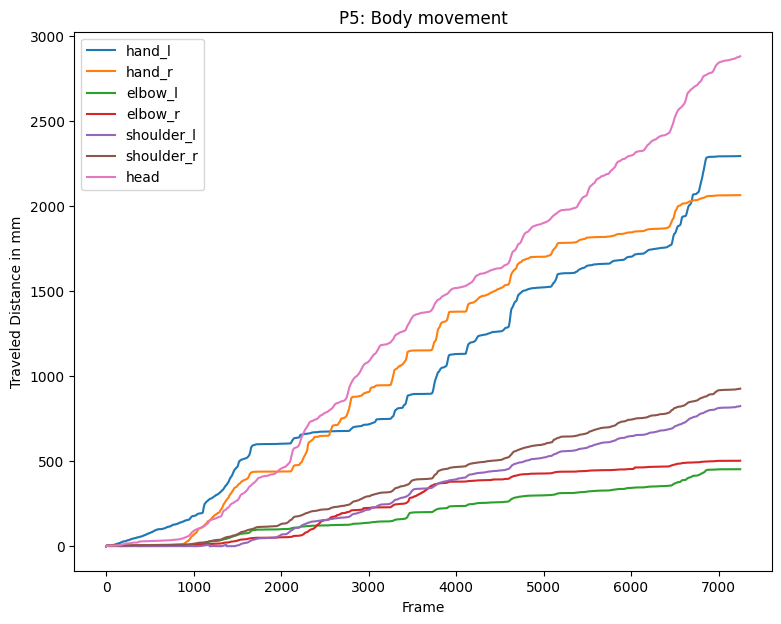

In [24]:
plt.figure(figsize=(9,7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P5_tr_dis.index, P5_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P5: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P5_traveled_distance.png')

In [25]:
P6_tr_dis = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P6_dist_traveled/conv_P6&5_e_P6_whole_dist_traveled.tsv", delimiter="\t", header = 0)

In [26]:
P6_tr_dis.rename(columns= {"P6_elbow_rP6_whole_dist_traveled": "elbow_r", "P6_hand_rP6_whole_dist_traveled": "hand_r", "P6_shoulder_lP6_whole_dist_traveled":"shoulder_l","P6_elbow_lP6_whole_dist_traveled":"elbow_l", "P6_headP6_whole_dist_traveled": "head", "P6_shoulder_rP6_whole_dist_traveled":"shoulder_r","P6_hand_lP6_whole_dist_traveled": "hand_l"}, inplace=True)
P6_tr_dis = P6_tr_dis[["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]]

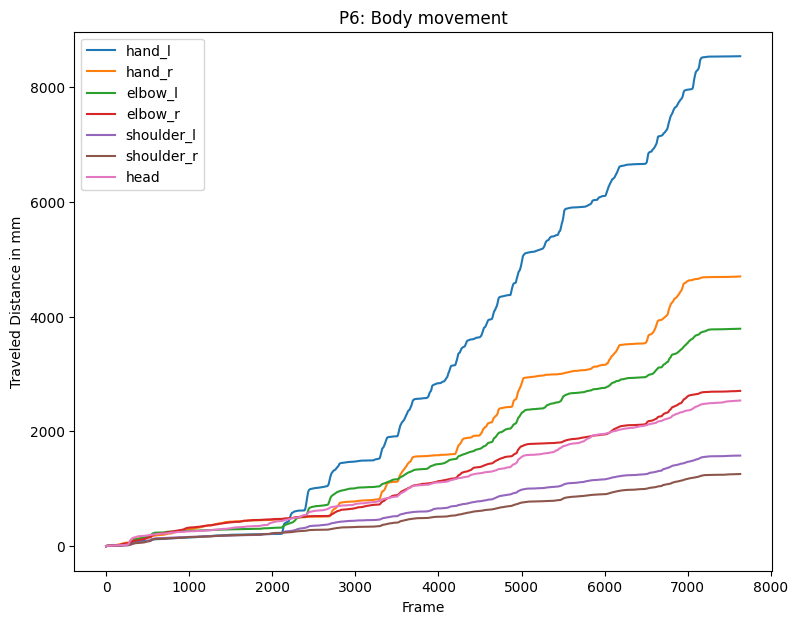

In [27]:
plt.figure(figsize=(9,7))
for col in ["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]: 
    plt.plot(P6_tr_dis.index, P6_tr_dis[col], label=f"{col}")
    plt.legend(loc = 'upper left')
    plt.title('P6: Body movement')
    plt.xlabel('Frame')
    plt.ylabel('Traveled Distance in mm')
    plt.savefig('P6_traveled_distance.png')

In [28]:
P1_max_dis = P1_tr_dis[::-1]
P1_max_dis = P1_max_dis.iloc[0].tolist()

P2_max_dis = P2_tr_dis[::-1]
P2_max_dis = P2_max_dis.iloc[0].tolist()

P3_max_dis = P3_tr_dis[::-1]
P3_max_dis = P3_max_dis.iloc[0].tolist()

P4_max_dis = P4_tr_dis[::-1]
P4_max_dis = P4_max_dis.iloc[0].tolist()

P5_max_dis = P5_tr_dis[::-1]
P5_max_dis = P5_max_dis.iloc[0].tolist()

P6_max_dis = P6_tr_dis[::-1]
P6_max_dis = P6_max_dis.iloc[0].tolist()


In [29]:
bodyparts = ["left hand", "right hand", "left elbow", "right elbow","left shoulder", "right shoulder", "head"]

In [30]:
Dataframe = pd.DataFrame('x', index=range(6), columns=bodyparts)

In [31]:
P1_max_dis_sum = sum(P1_max_dis)
P1_percentages = calculate_percentage(P1_max_dis, P1_max_dis_sum)

P2_max_dis_sum = sum(P2_max_dis)
P2_percentages = calculate_percentage(P2_max_dis, P2_max_dis_sum)

P3_max_dis_sum = sum(P3_max_dis)
P3_percentages = calculate_percentage(P3_max_dis, P3_max_dis_sum)

P4_max_dis_sum = sum(P4_max_dis)
P4_percentages = calculate_percentage(P4_max_dis, P4_max_dis_sum)

P5_max_dis_sum = sum(P5_max_dis)
P5_percentages = calculate_percentage(P5_max_dis, P5_max_dis_sum)

P6_max_dis_sum = sum(P6_max_dis)
P6_percentages = calculate_percentage(P6_max_dis, P6_max_dis_sum)

In [32]:
Dataframe.loc[0]=P1_percentages
Dataframe.loc[1]=P2_percentages
Dataframe.loc[2]=P3_percentages
Dataframe.loc[3]=P4_percentages
Dataframe.loc[4]=P5_percentages
Dataframe.loc[5]=P6_percentages

In [33]:
Dataframe

,left hand,right hand,left elbow,right elbow,left shoulder,right shoulder,head
0,28.017797,23.325871,5.314835,4.492888,8.447559,7.809727,22.591323
1,16.713747,31.518399,4.100309,7.979713,9.664154,8.92924,21.094438
2,16.249718,35.839452,6.980015,10.872777,6.312357,6.745775,16.999906
3,23.199909,17.151616,6.624799,7.675654,10.093231,10.155237,25.099553
4,23.067664,20.756236,4.552961,5.054971,8.283401,9.314915,28.969852
5,33.999783,18.719851,15.089231,10.779806,6.290192,5.011272,10.109865


In [34]:
means_whole_body = Dataframe.mean(axis=0)

In [35]:
#Dataframe.loc[len(Dataframe)] = means_whole_body

In [36]:
Dataframe

,left hand,right hand,left elbow,right elbow,left shoulder,right shoulder,head
0,28.017797,23.325871,5.314835,4.492888,8.447559,7.809727,22.591323
1,16.713747,31.518399,4.100309,7.979713,9.664154,8.92924,21.094438
2,16.249718,35.839452,6.980015,10.872777,6.312357,6.745775,16.999906
3,23.199909,17.151616,6.624799,7.675654,10.093231,10.155237,25.099553
4,23.067664,20.756236,4.552961,5.054971,8.283401,9.314915,28.969852
5,33.999783,18.719851,15.089231,10.779806,6.290192,5.011272,10.109865


In [37]:
print(means_whole_body)
body_array = np.array(means_whole_body)
print(body_array)

left hand         23.541437
right hand        24.551904
left elbow         7.110358
right elbow        7.809302
left shoulder      8.181816
right shoulder     7.994361
head              20.810823
dtype: object
[23.541436516893636 24.551904136593635 7.110358016643597 7.809301819666659
 8.181815786743867 7.994361102678152 20.810822620780453]


In [38]:
#plot_values = np.array(list(zip(body_array, P1_percentages, P2_percentages, P3_percentages, P4_percentages, P5_percentages, P6_percentages)))
#plot_values 

plot_values = np.array(list(zip(P1_percentages, P2_percentages, P3_percentages, P4_percentages, P5_percentages, P6_percentages)))

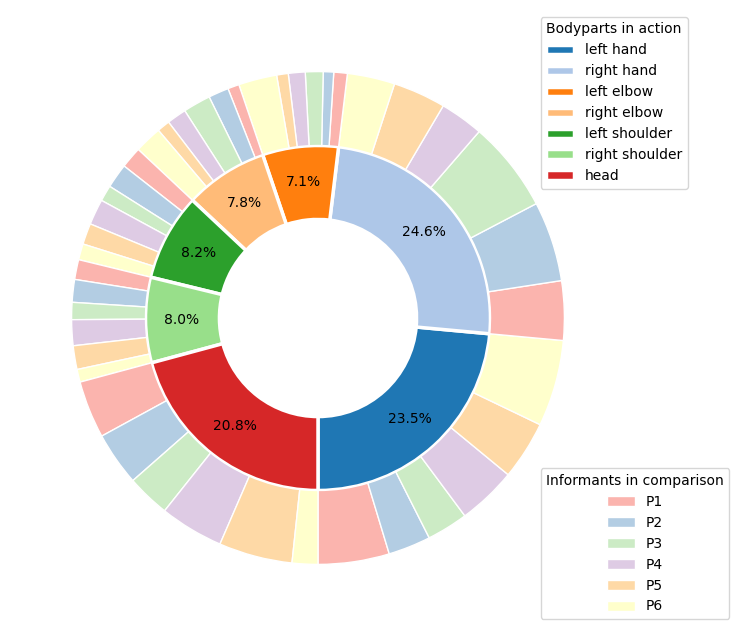

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
                       
size = 0.3
outer_vals = body_array
inner_vals = plot_values


cmap1 = plt.colormaps["tab20"]
outer_colors = cmap1(np.arange(7))
cmap2 = plt.colormaps["Pastel1"]
inner_colors_single = cmap2(np.arange(6))
inner_colors = np.tile(inner_colors_single, (7, 1))

pie1 = ax.pie(outer_vals, radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, linewidth=2.5, edgecolor='w',), labels=bodyparts, labeldistance=None,
       startangle=270, autopct ='%1.1f%%',pctdistance=0.79, textprops={'size': 'medium'})


pie2 = ax.pie(inner_vals.flatten(), radius=1, colors = inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=270, labels=["P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6","P1","P2","P3","P4","P5","P6"],
       labeldistance = None)

handles, labels = ax.get_legend_handles_labels()

legend_1 = ax.legend(handles[:7], labels[:7],
          title="Bodyparts in action",
          loc="upper left",
          bbox_to_anchor=(0.85, 0, 0.5, 1))

plt.gca().add_artist(legend_1)

ax.legend(handles[7:13], labels[7:13],
          title="Informants in comparison",
          loc="lower left",
          bbox_to_anchor=(0.85, 0, 0.5, 1))

ax.set(aspect="equal")
#ax.set_title('Upper body movement during conversations', fontsize=16, loc='center')
plt.savefig('Upper_body_movement_in_percent')
plt.show()

In [40]:
P1_max_dis

[8707.522, 7249.34, 1651.773, 1396.324, 2625.378, 2427.149, 7021.053]

In [41]:
max_dis_df = pd.DataFrame(list(zip(P1_max_dis, P2_max_dis, P3_max_dis, P4_max_dis, P5_max_dis, P6_max_dis)),columns=["1", "2", "3", "4", "5", "6"])

In [42]:
max_dis_df = max_dis_df.T

In [43]:
max_dis_df.columns=["hand_l", "hand_r", "elbow_l", "elbow_r","shoulder_l", "shoulder_r", "head"]

In [44]:
max_dis_df

,hand_l,hand_r,elbow_l,elbow_r,shoulder_l,shoulder_r,head
1,8707.522,7249.340,1651.773,1396.324,2625.378,2427.149,7021.053
2,5547.295,10460.961,1360.893,2648.468,3207.534,2963.616,7001.247
3,2952.833,6512.600,1268.380,1975.757,1147.056,1225.815,3089.154
4,4926.497,3642.143,1406.775,1629.924,2143.296,2156.463,5329.886
5,2294.034,2064.167,452.783,502.707,823.768,926.350,2880.995
6,8532.301,4697.777,3786.667,2705.210,1578.534,1257.587,2537.087


In [45]:
max_dis_df = max_dis_df.div(1000).round(2)

In [46]:
max_dis_df.to_excel("Max_traveled_dist.xlsx")  

In [47]:
P1_max_dis_sum = sum(P1_max_dis)
P1_percentages_n = calculate_percentage(P1_max_dis, P1_max_dis_sum)

In [48]:
P1_percentages_n = calculate_percentage(P1_max_dis, P1_max_dis_sum)

In [49]:
print(P1_percentages_n)

[28.0177971042976, 23.325871270847063, 5.314834780360814, 4.4928881631147455, 8.447559262679626, 7.809726834327701, 22.591322584372453]


In [50]:
print(P1_percentages)

[28.0177971042976, 23.325871270847063, 5.314834780360814, 4.4928881631147455, 8.447559262679626, 7.809726834327701, 22.591322584372453]
